In [2]:
'''
PROBLEM STATEMENT:-
    To build a model to accurately classify a piece of news as REAL or FAKE. Using sklearn,  build a TfidfVectorizer
    on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end,
    the accuracy score and the confusion matrix tell us how well our model fares. On completion, create a GitHub
    account and create a repository. Commit your python code inside the newly created repository.


 Author = Vedant Deshpande 

 References = Medium.com '''

'\nPROBLEM STATEMENT:-\n    To build a model to accurately classify a piece of news as REAL or FAKE. Using sklearn,  build a TfidfVectorizer\n    on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end,\n    the accuracy score and the confusion matrix tell us how well our model fares. On completion, create a GitHub\n    account and create a repository. Commit your python code inside the newly created repository.\n\n\n Author = Vedant Deshpande \n\n References = Medium.com '

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('news.csv')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 123.8+ KB
None


In [5]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
labels = dataset.label
x_train,x_test,y_train,y_test=train_test_split(dataset['text'], dataset['label'], test_size=0.2, random_state=7)

In [7]:
vectoriser = TfidfVectorizer()
tfidf_train = vectoriser.fit_transform(x_train)
tfidf_test = vectoriser.transform(x_test)

In [14]:
tfidf_train.shape,tfidf_test.shape

((5068, 61958), (1267, 61958))

In [17]:
pac = PassiveAggressiveClassifier(max_iter = 50)

pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [19]:
y_pred = pac.predict(tfidf_test)

score = accuracy_score(y_test,y_pred)

In [20]:
print('accuracy = ', round(score*100,2))

print(confusion_matrix(y_test,y_pred,labels=['FAKE','REAL']))

accuracy =  93.05
[[586  52]
 [ 36 593]]


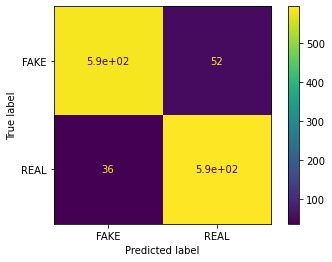

In [40]:
plot_confusion_matrix(pac, tfidf_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP